# Exploring Gender Bias in 1973 UC Berkeley Graduate Admissions

Group 3: Alex Haddon, Kashish Joshipura, Nusaibah Hossain, Euna Ao

### Introduction

All 12,763 students who applied to graduate programs at UC-Berkeley in the fall of 1973 are included in the "Berkeley Dataset." The Berkeley Dataset contains 12.763 applicants and their respective major, gender, and admission status (ie. accepted or rejected). This dataset has become a well-known illustration of Simpson's Paradox as part of an investigation into the possibility of gender bias in admissions.

Past scholarly discourse has occurred regarding gender bias in university admissions. In a 2010 study conducted in Israel, admissions scores were found to be a fair, unbiased predictor of first year performance (Azen, Bronner, & Gafni, 2010). Similarly, a 2017 study found that there was equal probability of admittance across all genders (Bhattacharya, Shin Kanaya, & Stevens, 2017). 

We want to explore whether the Berkeley Dataset indicates the possibility of gender bias in university admissions. More specifically, our research question is: “ Is there indication of gender-based discrimination in university enrollment?” We would like to acknowledge that the Berkeley dataset contains outdated binary conceptions of gender. However, for the sake of this project, we will assume that gender is binary - only male or female. To analyze the dataset, we compare the proportion of admitted male applicants to the proportion of admitted female applicants and perform a two-tailed hypothesis test twice - once using a bootstrap distribution and the other with a theory-based hypothesis test. We will compare the results and determine if the results are statistically significant with respect to our null hypothesis. 



### Preliminary Results

In [6]:
# Load required packages
library(plyr)
library(tidyverse)
library(infer)
library(repr)
library(stringr)

In [7]:
# Reading the dataset
url <- "https://raw.githubusercontent.com/kashish1928/STAT201_Group_03/main/data/berkeley.csv"
admission_data <- read.csv(url)

head(admission_data)

,Year,Major,Gender,Admission
,<int>,<chr>,<chr>,<chr>
1,1973,C,F,Rejected
2,1973,B,M,Accepted
3,1973,Other,F,Accepted
4,1973,Other,M,Accepted
5,1973,Other,M,Rejected
6,1973,Other,M,Rejected


In [8]:
#Rename Columns
new_col_names <- c("year", "major", "gender", "admission")
admission_data <- rename(admission_data, !!!setNames(names(admission_data), new_col_names))

head(admission_data)

,year,major,gender,admission
,<int>,<chr>,<chr>,<chr>
1,1973,C,F,Rejected
2,1973,B,M,Accepted
3,1973,Other,F,Accepted
4,1973,Other,M,Accepted
5,1973,Other,M,Rejected
6,1973,Other,M,Rejected


In [9]:
# Number of Rows and Columns

total_rows <- admission_data |> nrow()
print(sprintf("There are %d rows in the data frame", total_rows))

total_cols <- admission_data |> ncol()
print(sprintf("There are %d columns in the data frame", total_cols))

[1] "There are 12763 rows in the data frame"
[1] "There are 4 columns in the data frame"


In [10]:
str(admission_data)

'data.frame':	12763 obs. of  4 variables:
 $ year     : int  1973 1973 1973 1973 1973 1973 1973 1973 1973 1973 ...
 $ major    : chr  "C" "B" "Other" "Other" ...
 $ gender   : chr  "F" "M" "F" "M" ...
 $ admission: chr  "Rejected" "Accepted" "Accepted" "Accepted" ...


In [11]:
# Remove NA values (if any)

admission_data_function <- function(cols) {
  for (i in cols) {
    admission_data <- admission_data |>
          filter(!is.na(i))
  }
  return(admission_data)
}

column_names <- colnames(admission_data)

admission_data <- admission_data_function(column_names)

head(admission_data)

,year,major,gender,admission
,<int>,<chr>,<chr>,<chr>
1,1973,C,F,Rejected
2,1973,B,M,Accepted
3,1973,Other,F,Accepted
4,1973,Other,M,Accepted
5,1973,Other,M,Rejected
6,1973,Other,M,Rejected


In [12]:
# Display all the different levels

print(unique(admission_data$year))
print(unique(admission_data$major))
print(unique(admission_data$gender))
print(unique(admission_data$admission))

[1] 1973
[1] "C"     "B"     "Other" "F"     "A"     "D"     "E"    
[1] "F" "M"
[1] "Rejected" "Accepted"


In [13]:
# Remove unnecessary columns

admission_data_updated <- admission_data[, -c(1,2)]
head(admission_data_updated)

,gender,admission
,<chr>,<chr>
1,F,Rejected
2,M,Accepted
3,F,Accepted
4,M,Accepted
5,M,Rejected
6,M,Rejected


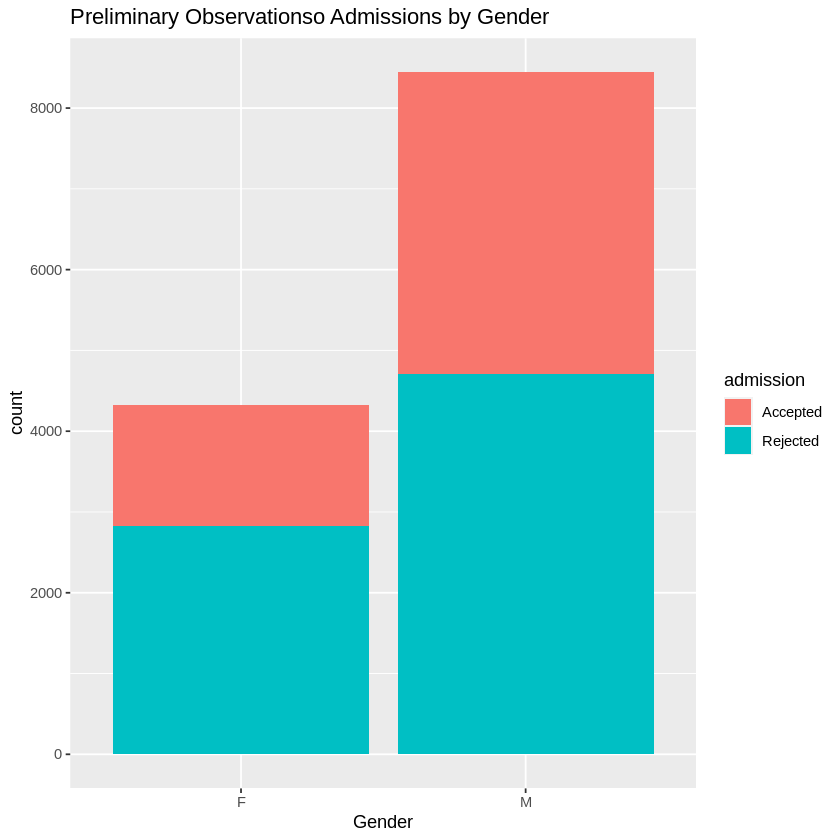

In [14]:
gender_admission_plot <- admission_data_updated |>
    ggplot(aes(x = gender, fill = admission)) +
    geom_bar() +
    labs(title = "Preliminary Observationso Admissions by Gender",
         x = "Gender")

gender_admission_plot

In [18]:
# Admission Counts by Gender
admission_counts <- admission_data_updated |>
    group_by(gender,admission) |>
    summarise(count = n())
head(admission_counts)
     

`summarise()` has grouped output by 'gender'. You can override using the
`.groups` argument.


gender,admission,count
<chr>,<chr>,<int>
F,Accepted,1494
F,Rejected,2827
M,Accepted,3738
M,Rejected,4704


In [19]:
# Add total number of applications by each gender
admission_counts <- admission_counts |>
    mutate(total = sum(count))

admission_counts

gender,admission,count,total
<chr>,<chr>,<int>,<int>
F,Accepted,1494,4321
F,Rejected,2827,4321
M,Accepted,3738,8442
M,Rejected,4704,8442


In [20]:
# Observed Proportion of Admitted Female students 
p_hat_female <- admission_counts$count[1] / admission_counts$total[1]
p_hat_female


[1] 0.3457533

In [21]:
# Observed Proportion of Admitted Male students
p_hat_male <- admission_counts$count[3] / admission_counts$total[3]
p_hat_male

[1] 0.4427861

In [22]:
# Pooled Proportion
p_hat_pooled <- (p_hat_male*admission_counts$total[3] + p_hat_female*admission_counts$total[1])/(admission_counts$total[3]+admission_counts$total[1])
p_hat_pooled

[1] 0.409935

In [23]:
# Total Number of Observations
n_pooled <- admission_counts$total[1] + admission_counts$total[3]
n_pooled

[1] 12763

In [25]:
# Test For Feasibility of Normal Approximation
n_pooled*p_hat_pooled
n_pooled*(1-p_hat_pooled)

[1] 5232

[1] 7531

In [26]:
# Observed Difference in Proportions

obs_difference <- p_hat_male - p_hat_female
obs_difference

[1] 0.09703277

### Methods: Plan

We are investigating whether there existed gender discrimination in graduate admissions of 1973 UC Berkeley students between male and female applicants. Our null hypothesis therefore would be that there existed no such discrimination and the proportion of males admitted minus the proportion of females admitted would be equal to zero. 

H0 : pm - pf = 0

Our alternative hypothesis is that such a difference did exist and therefore the subtraction of proportions would be greater than 0 and males were admitted at a higher rate than females. 

Ha : pm - pf  ≠ 0

For this question we will test three different levels of significance. We recognize that alpha represents the probability of a Type I error so we will test three varying levels of significance: 10%, 5%, and 1%. 


Our observed difference in proportions is : 0.0970327718040209

In order to use a classical test of based on the Normal distribution we must first verify that our data meets the initial condition that is that our sample size is such that  𝑛𝑝̂ ≥10 and  𝑛(1−𝑝̂ )≥10, in order the make sure the approximation of the null-model by the standard Gaussian is fairly good. Proving this to be true will allow us to know our sampling distribution under  𝐻0 of the test statistic  𝑍 is approximately  𝑁(0,1). 

In order to ensure the normally distributed null model we will need to use this formula to calculate the pooled proportion. 



**INSERT CODE***

Now that we know our null model can be represented as approximately normal we can calculate the Z test statistic. 



***SHOULD WE ALSO DO A BOOTSTRAP DISTRIBUTION OF THIS MODEL OR ONLY THEORY BASED APPROACHES???****

We will then compare the prop.test p values with the varying significance levels we identified in the introduction and either reject or fail to reject the null hypothesis. Afterwards we will offer exploratory questions that suggest future research or hypotheses to be tested.

We will then create a 95% confidence interval centered around the observed difference in proportions and then compare it to the null hypothesis difference in proportion which is zero. 

#### What do you expect to find?

We expect to find that there did exist such biases towards women during this period as gender discrimination existed and still exists today. Our findings hope to show that these biases created unfair admissions that are statistically significant and were not caused by chance with various levels of confidence. 

##### What impact could such findings have?

Ideally these findings could be used to help draw attention to the biases admissions have against certain groups of people. An internal review of how the admissions process works could lead to the discovery of certain methods that directly/indirectly unfairly affected the chance of admissions for these groups of people. 



##### What future questions could this lead to?

Ideally further research could explore today’s admissions data to see if this bias still exists between male and non-male students as well as investigate potential biases against other minority groups of applicants. 


### References: 
https://www.science.org/doi/10.1126/science.187.4175.398
Sex bias in graduate admissions: Data from Berkeley | Science. (n.d.). Retrieved March 9, 2023, from https://www.science.org/doi/10.1126/science.187.4175.398 
